In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
# from sklearn.metrics import mean_squared_error,r2_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [6]:
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [7]:
num_transformer = StandardScaler()
oh_encd = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OnehotEncoder",oh_encd,cat_feature),
        ("StandardScaler",num_transformer,num_feature)
    ]
)

In [8]:
x = preprocessor.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [10]:
def evaluate_model(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    r2 = r2_score(true,pred)

    return mae,mse,r2

In [16]:
models = {
    "LinearRegression" : LinearRegression(),
    "Ridge": Ridge(),
    "Lasso" : Lasso(),
    "SVR" : SVR(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(verbose=False),
    "XGBRegressor" : XGBRegressor()
}

models_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_mae,train_mse,train_r2 = evaluate_model(y_train,y_train_pred)
    test_mae,test_mse,test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i],"\n")
    models_list.append(list(models.keys())[i])

    print("Model Performance for training set:")
    print("--RMSE:{:.4f}".format(np.sqrt(train_mse)))
    print("--MAE:{:.4f}".format(train_mae))
    print("--R2_score:{:.4f}".format(train_r2))

    print("-"*40)

    print("Model Performance for testing set:")
    print("--RMSE:{:.4f}".format(np.sqrt(test_mse)))
    print("--MAE:{:.4f}".format(test_mae))
    print("--R2_score:{:.4f}".format(test_r2))
    r2_list.append(test_r2)

    print("="*40)
    print('\n')

LinearRegression 

Model Performance for training set:
--RMSE:5.2483
--MAE:4.1985
--R2_score:0.8751
----------------------------------------
Model Performance for testing set:
--RMSE:5.5576
--MAE:4.4183
--R2_score:0.8759


Ridge 

Model Performance for training set:
--RMSE:5.2487
--MAE:4.1977
--R2_score:0.8751
----------------------------------------
Model Performance for testing set:
--RMSE:5.5566
--MAE:4.4155
--R2_score:0.8759


Lasso 

Model Performance for training set:
--RMSE:6.5106
--MAE:5.1582
--R2_score:0.8078
----------------------------------------
Model Performance for testing set:
--RMSE:6.8705
--MAE:5.3929
--R2_score:0.8103


SVR 

Model Performance for training set:
--RMSE:6.7557
--MAE:4.9467
--R2_score:0.7931
----------------------------------------
Model Performance for testing set:
--RMSE:8.2440
--MAE:5.7283
--R2_score:0.7268


KNeighborsRegressor 

Model Performance for training set:
--RMSE:5.6788
--MAE:4.5063
--R2_score:0.8538
----------------------------------------

In [18]:
# Result:
pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.875907
0,LinearRegression,0.875863
8,CatBoostRegressor,0.852108
6,RandomForestRegressor,0.846860
7,AdaBoostRegressor,0.838735
9,XGBRegressor,0.811816
2,Lasso,0.810281
4,KNeighborsRegressor,0.772528
3,SVR,0.726848
5,DecisionTreeRegressor,0.724195


In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.59


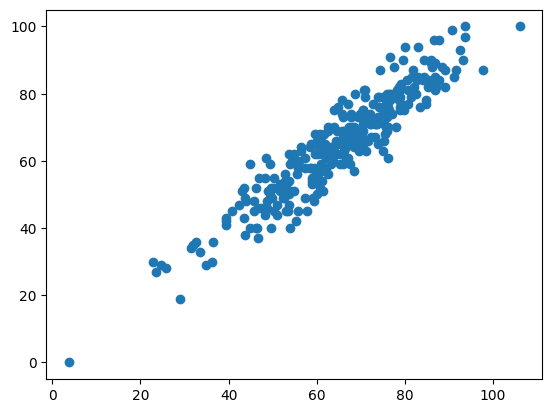

In [23]:
plt.scatter(y_pred,y_test)

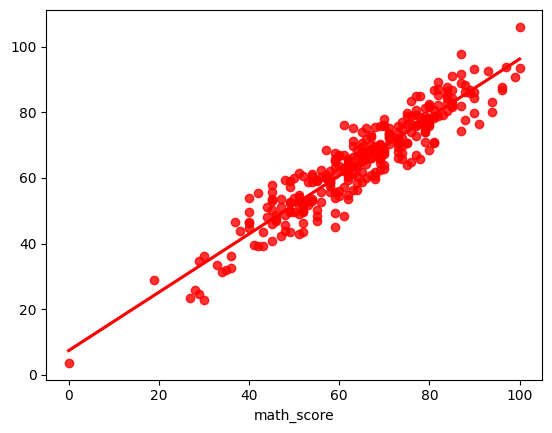

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [25]:
pred_df = pd.DataFrame({"Actual":y_test,"predicted":y_pred,"Residual":y_test - y_pred})

In [26]:
pred_df

,Actual,predicted,Residual
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
...,...,...,...
468,77,72.854766,4.145234
935,70,62.606548,7.393452
428,65,58.650347,6.349653
7,40,44.841375,-4.841375
